     
<h1><center>Modelo FitzHugh-Nagumo</center></h1>

El modelo simplificado de Hodgkin-Huxley para la descripción del comportamiento de una neurona viene dado por el sistema de ecuaciones diferenciales
$\begin{eqnarray}
{dv\over dt}&=&v - {v^3 \over 3}-w + I_{ext}\\
\tau{dw\over dt}&=& v + a -bw
\end{eqnarray}
$


Nuestro objetivo es dar una descripción cualitativa del sistema de ecuaciones diferenciales, obteniendo su plano fase, las ceroclinas y una aproximación a la solución.

Primero mandaremos llamar a las paqueterias necesarias para la implementación computacional:

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Ahora introduciremos a la ecuación diferencial por medio de una función en Python: 

In [18]:
def dv(v,w):
    return v - (v**3 /3) - w + Iext
def dw(v,w):
    return v/tau + a/tau -(b/tau)*w
def FN(Y, t):
    v,w = Y
    dvdt = dv(v,w)
    dwdt = dw(v,w)
    return dvdt, dwdt

Ahora introduciremos los parametros que usaremos (estos son tomados de la literatura, para más referencias sobre el modelo, puede consultarse el libro de Izhikevich, E.M. (2007). Dynamical Systems in Neuroscience: The geometry of excitability and bursting. The MIT Press. Cambridge). Si $a=0$ y $b=0$, obtenemos el oscilador de van der Pol.

In [60]:
Iext = 0.5 
a = 0.7
b = 0.8  # ¿Que ocurre si b = 2?
tau = 12.5

Resolveremos la ecuacion diferencial con condición inicial $v_0 = 0.5$, $w_0 = 0.1$ en un lapso de tiempo entre $t=0$ y $t=150$. Para resolver la ecuación usaremos la paqueteria odeint del paquete Scipy.

In [61]:
v0 = 0.5 
w0 = 0.1 
t = np.arange(0,150,0.01)
y0 =[v0,w0]
y = odeint(FN, y0, t)
v = y[:,0]
w = y[:,1]


Ahora graficaremos a la funciones $v$ y $w$.

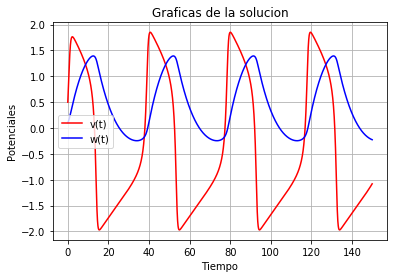

In [62]:
plt.figure(1)
plt.plot(t,v, 'r', label = 'v(t)')
plt.plot(t,w,'b', label = 'w(t)')
plt.xlabel('Tiempo')
plt.ylabel('Potenciales')
plt.title('Graficas de la solucion')
plt.legend(loc = 'best')
plt.grid()
plt.show()

La gráfica del plano fase, junto a las ceroclinas y el campo de pendientes es la siguiente

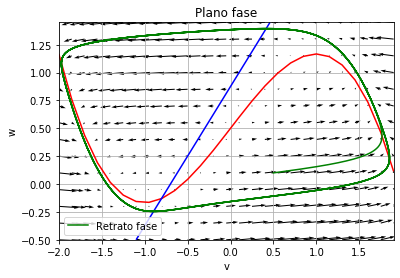

In [63]:
plt.figure(2)
plt.plot(v,w, 'g', label = 'Retrato fase')
plt.xlabel('v')
plt.ylabel('w')
plt.title('Plano fase')
plt.legend(loc = 'best')
plt.grid()

# Campo de direcciones
[V,W] = np.meshgrid(np.arange(-2, 2, 0.15),
                    np.arange(-0.5,1.5, 0.15))
dV = dv(V,W)
dW = dw(V,W)
plt.quiver(V,W,dV,dW)

# Ceroclinas (isoclinas nulas)
plt.contour(V,W,dV, levels=[0],linewidths = 1.5, colors='red')
plt.contour(V,W,dW, levels=[0],linewidths = 1.5, colors='blue')
plt.show()